# Recommandation Systems
### Rating Based, Popularity-Based, Rating-Popularity Based and `Content-Based`

#### Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
# Data from Kaggle 'https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata/data'
movie_df = pd.read_csv("tmdb_5000_movies.csv")
credit_df = pd.read_csv("tmdb_5000_credits.csv")
credit_df.head()

C:\Users\Utkrisht.Dutta\AppData\Local\Temp\ipykernel_28492\4073342374.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [2]:
movie_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
movie_df.rename(columns={'id':'movie_id'},inplace=True)
movie_df.columns

Index(['budget', 'genres', 'homepage', 'movie_id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

#### Merge Dataframe

In [4]:
merged_df = pd.merge(movie_df,credit_df,on="movie_id")
merged_df.head()

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
merged_df.columns

Index(['budget', 'genres', 'homepage', 'movie_id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title_x', 'vote_average', 'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [6]:
merged_df.drop(columns=['title_y','title_x'],axis=1,inplace=True)
merged_df.rename(columns={'original_title':'title'},inplace=True)
merged_df.shape

(4803, 21)

In [7]:
merged_df.describe()

,budget,movie_id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   movie_id              4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   title                 4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

#### Feature Engineering

In [9]:
merged_df['status'].value_counts()

status
Released           4795
Rumored               5
Post Production       3
Name: count, dtype: int64

In [10]:
merged_df['genres'].value_counts()

genres
[{"id": 18, "name": "Drama"}]                                                                                                            370
[{"id": 35, "name": "Comedy"}]                                                                                                           282
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                                                          164
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                                                         144
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                                                              142
                                                                                                                                        ... 
[{"id": 12, "name": "Adventure"}, {"id": 28, "name": "Action"}, {"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]            1
[{"id"

In [11]:
merged_df['production_countries'].value_counts()

production_countries
[{"iso_3166_1": "US", "name": "United States of America"}]                                                                                                                                     2977
[{"iso_3166_1": "GB", "name": "United Kingdom"}, {"iso_3166_1": "US", "name": "United States of America"}]                                                                                      181
[]                                                                                                                                                                                              174
[{"iso_3166_1": "GB", "name": "United Kingdom"}]                                                                                                                                                131
[{"iso_3166_1": "DE", "name": "Germany"}, {"iso_3166_1": "US", "name": "United States of America"}]                                                                                             119

In [12]:
merged_df['cast'].value_counts()

cast
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [13]:
merged_df[merged_df['status']=='Rumored']['popularity']

4401    0.020600
4453    0.108135
4508    0.010909
4662    0.092100
4754    0.077577
Name: popularity, dtype: float64

In [14]:
def get_keywords(x):
    ans = ""
    x = ast.literal_eval(x)
    for i in x:
        ans+=i['name']+','
    return ans.strip(',')

In [15]:
merged_df['keywords']= merged_df['keywords'].apply(lambda x:get_keywords(x))
merged_df['actor']= merged_df['cast'].apply(lambda x:get_keywords(x))
merged_df['genres']=merged_df['genres'].apply(lambda x:get_keywords(x))
merged_df['crew'] =merged_df['crew'].apply(lambda x : get_keywords(x))

In [16]:
merged_df.drop(columns=['status','homepage','production_countries','cast'],axis=1,inplace=True)
merged_df.shape

(4803, 18)

### Using Weighted average for each movie's Average Rating
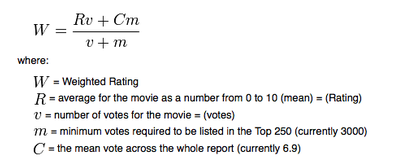

In [17]:
vote_average_mean = merged_df['vote_average'].mean()
vote_average_mean

6.092171559442016

In [18]:
# merged_df['vote_count'].value_counts(sort=True)[-10:]
vote_count_matter = merged_df['vote_count'].quantile(0.7)
vote_count_matter

581.0

In [19]:
merged_df['weighted_average'] = (merged_df['vote_average']*merged_df['vote_count'] + vote_average_mean*vote_count_matter)/(merged_df['vote_count']+vote_count_matter)

In [20]:
merged_df['weighted_average'].describe()

count    4803.000000
mean        6.219578
std         0.399794
min         4.678190
25%         6.037905
50%         6.100745
75%         6.318997
max         8.340775
Name: weighted_average, dtype: float64

#### Rating-Based Recommendation Systems

In [21]:
weighted_average_df = merged_df.sort_values('weighted_average',ascending=False)
weighted_average_df[['movie_id','title','weighted_average','keywords','popularity']].head(20)

,movie_id,title,weighted_average,keywords,popularity
1881,278,The Shawshank Redemption,8.340775,"prison,corruption,police brutality,prison cell...",136.747729
3337,238,The Godfather,8.192887,"italy,love at first sight,loss of father,patri...",143.659698
662,550,Fight Club,8.171648,"support group,dual identity,nihilism,rage and ...",146.757391
3232,680,Pulp Fiction,8.157615,"transporter,brothel,drug dealer,boxer,massage,...",121.463076
65,155,The Dark Knight,8.102674,"dc comics,crime fighter,secret identity,scarec...",187.322927
809,13,Forrest Gump,8.056059,"vietnam veteran,hippie,mentally disabled,runni...",138.133331
1818,424,Schindler's List,8.038748,"factory,concentration camp,hero,holocaust,worl...",104.469351
3865,244786,Whiplash,8.034695,"jazz,obsession,conservatory,music teacher,new ...",192.528841
96,27205,Inception,8.018611,"loss of lover,dream,kidnapping,sleep,subconsci...",167.583710
1990,1891,The Empire Strikes Back,8.010426,"rebel,android,asteroid,space battle,snow storm...",78.517830


In [22]:
import seaborn as sns

#### Data Visualisation (Rating)

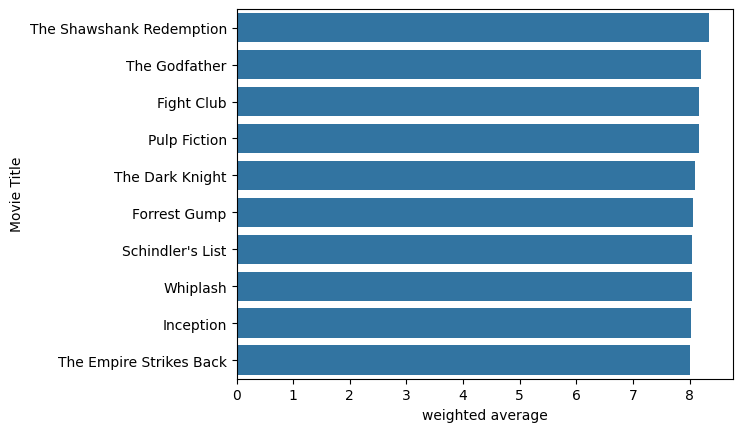

In [23]:
sns.barplot(x=weighted_average_df['weighted_average'][:10],y=weighted_average_df['title'][:10],data=weighted_average_df)
plt.xlabel("weighted average")
plt.ylabel("Movie Title")
plt.savefig("best movie by weighted_average")

#### Popularity-Based Recommendation Systems

In [24]:
popularity_df = merged_df.sort_values('popularity',ascending=False).head(10)
popularity_df.head(20)

,budget,genres,movie_id,keywords,original_language,title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,crew,actor,weighted_average
546,74000000,"Family,Animation,Adventure,Comedy",211672,"assistant,aftercreditsstinger,duringcreditssti...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",2015-06-17,1156730962,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Before Gru, they had a history of bad bosses",6.4,4571,"Christopher Meledandri,Kyle Balda,Ken Daurio,C...","Sandra Bullock,Jon Hamm,Michael Keaton,Allison...",6.365286
95,165000000,"Adventure,Drama,Science Fiction",157336,"saving the world,artificial intelligence,fathe...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",2014-11-05,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mankind was born on Earth. It was never meant ...,8.1,10867,"Hans Zimmer,Christopher Nolan,Christopher Nola...","Matthew McConaughey,Jessica Chastain,Anne Hath...",7.998100
788,58000000,"Action,Adventure,Comedy",293660,"anti hero,mercenary,marvel comic,superhero,bas...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",2016-02-09,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Witness the beginning of a happy ending,7.4,10995,"Ronna Kress,Sala Baker,Lauren Shuler Donner,Rh...","Ryan Reynolds,Morena Baccarin,Ed Skrein,T.J. M...",7.334360
94,170000000,"Action,Science Fiction,Adventure",118340,"marvel comic,spaceship,space,outer space,orpha...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",2014-07-30,773328629,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",All heroes start somewhere.,7.9,9742,"Craig Wood,Christopher Boyes,Christopher Boyes...","Chris Pratt,Zoe Saldana,Dave Bautista,Vin Dies...",7.798252
127,150000000,"Action,Adventure,Science Fiction,Thriller",76341,"future,chase,post-apocalyptic,dystopia,austral...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",2015-05-13,378858340,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",What a Lovely Day.,7.2,9427,"Iain Smith,Ronna Kress,Bruce Berman,John Seale...","Tom Hardy,Charlize Theron,Nicholas Hoult,Hugh ...",7.135687
28,150000000,"Action,Adventure,Science Fiction,Thriller",135397,"monster,dna,tyrannosaurus rex,velociraptor,isl...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",2015-06-09,1513528810,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The park is open.,6.5,8662,"Steven Spielberg,John Papsidera,Frank Marshall...","Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",6.474365
199,140000000,"Adventure,Fantasy,Action",22,"exotic island,blacksmith,east india trading co...",en,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 17th-century pira...",271.972889,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2003-07-09,655011224,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Prepare to be blown out of the water.,7.5,6985,"Arthur Schmidt,Dariusz Wolski,Klaus Badelt,Gor...","Johnny Depp,Geoffrey Rush,Orlando Bloom,Keira ...",7.391892
82,170000000,"Science Fiction,Action,Drama,Thriller",119450,"leader,colony,post-apocalyptic,dystopia,forest...",en,Dawn of the Planet of the Apes,A group of scientists in San Francisco struggl...,243.791743,"[{""name"": ""Ingenious Media"", ""id"": 290}, {""nam...",2014-06-26,710644566,130.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",One last chance for peace.,7.3,4410,"Kevin Mangan,Debra Zane,D

#### Data Visualisation (Popularity)

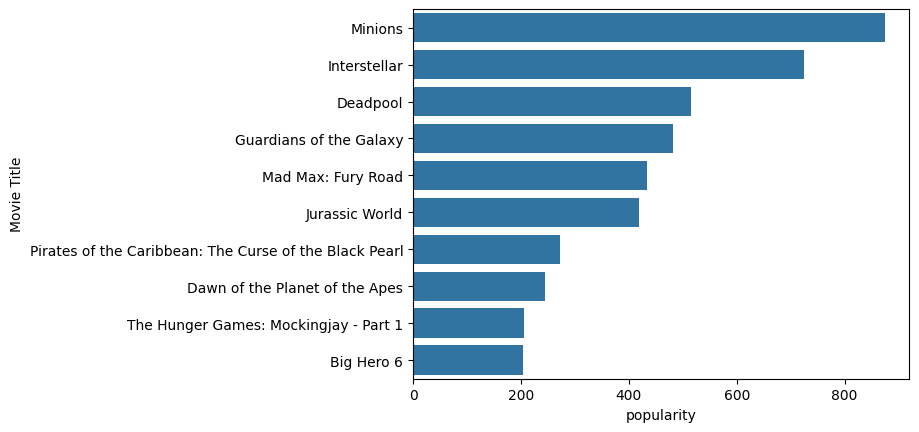

In [25]:
sns.barplot(x=popularity_df['popularity'][:10],y=popularity_df['title'][:10],data=popularity_df)
plt.xlabel("popularity")
plt.ylabel("Movie Title")
plt.savefig("best movie by popularity")

#### Normalize both popularity and Movie

In [26]:
from sklearn.preprocessing import MinMaxScaler
min_max_scalar = MinMaxScaler()
movie_scaled_df = min_max_scalar.fit_transform(merged_df[['popularity','weighted_average']])
merged_df[['normalized_popularity','normalized_weighted_average']] = movie_scaled_df
merged_df.head()


,budget,genres,movie_id,keywords,original_language,title,overview,popularity,production_companies,release_date,...,runtime,spoken_languages,tagline,vote_average,vote_count,crew,actor,weighted_average,normalized_popularity,normalized_weighted_average
0,237000000,"Action,Adventure,Fantasy,Science Fiction",19995,"culture clash,future,space war,space colony,so...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"Stephen E. Rivkin,Rick Carter,Christopher Boye...","Sam Worthington,Zoe Saldana,Sigourney Weaver,S...",7.148013,0.171815,0.674339
1,300000000,"Adventure,Fantasy,Action",285,"ocean,drug abuse,exotic island,east india trad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"Dariusz Wolski,Gore Verbinski,Jerry Bruckheime...","Johnny Depp,Orlando Bloom,Keira Knightley,Stel...",6.807627,0.158846,0.581403
2,245000000,"Action,Adventure,Crime",206647,"spy,based on novel,secret agent,sequel,mi6,bri...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"Thomas Newman,Sam Mendes,Anna Pinnock,John Log...","Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...",6.276075,0.122635,0.436273
3,250000000,"Action,Crime,Drama,Thriller",49026,"dc comics,crime fighter,terrorist,secret ident...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"Hans Zimmer,Charles Roven,Christopher Nolan,Ch...","Christian Bale,Michael Caine,Gary Oldman,Anne ...",7.509565,0.128272,0.773054
4,260000000,"Action,Adventure,Science Fiction",49529,"based on novel,mars,medallion,space travel,pri...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"Andrew Stanton,Andrew Stanton,John Lasseter,Co...","Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...",6.098319,0.050169,0.387739


#### Popularity and Rating-Based Recommendation Systems(50% and 50%)

In [27]:
merged_df['Score'] = merged_df['normalized_popularity']*0.5 + merged_df['normalized_weighted_average']*0.5 
merged_df.shape

(4803, 22)

In [28]:
merged_df[['title','normalized_popularity','normalized_weighted_average','Score']]

,title,normalized_popularity,normalized_weighted_average,Score
0,Avatar,0.171815,0.674339,0.423077
1,Pirates of the Caribbean: At World's End,0.158846,0.581403,0.370124
2,Spectre,0.122635,0.436273,0.279454
3,The Dark Knight Rises,0.128272,0.773054,0.450663
4,John Carter,0.050169,0.387739,0.218954
...,...,...,...,...
4798,El Mariachi,0.016298,0.426353,0.221325
4799,Newlyweds,0.000734,0.385613,0.193174
4800,"Signed, Sealed, Delivered",0.001650,0.388595,0.195122
4801,Shanghai Calling,0.000979,0.384786,0.192883


In [29]:
score_df = merged_df.sort_values('Score',ascending=False)
score_df.head(10)

,budget,genres,movie_id,keywords,original_language,title,overview,popularity,production_companies,release_date,...,spoken_languages,tagline,vote_average,vote_count,crew,actor,weighted_average,normalized_popularity,normalized_weighted_average,Score
95,165000000,"Adventure,Drama,Science Fiction",157336,"saving the world,artificial intelligence,fathe...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",2014-11-05,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Mankind was born on Earth. It was never meant ...,8.1,10867,"Hans Zimmer,Christopher Nolan,Christopher Nola...","Matthew McConaughey,Jessica Chastain,Anne Hath...",7.998100,0.827162,0.906439,0.866801
546,74000000,"Family,Animation,Adventure,Comedy",211672,"assistant,aftercreditsstinger,duringcreditssti...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",2015-06-17,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Before Gru, they had a history of bad bosses",6.4,4571,"Christopher Meledandri,Kyle Balda,Ken Daurio,C...","Sandra Bullock,Jon Hamm,Michael Keaton,Allison...",6.365286,1.000000,0.460630,0.730315
94,170000000,"Action,Science Fiction,Adventure",118340,"marvel comic,spaceship,space,outer space,orpha...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",2014-07-30,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",All heroes start somewhere.,7.9,9742,"Craig Wood,Christopher Boyes,Christopher Boyes...","Chris Pratt,Zoe Saldana,Dave Bautista,Vin Dies...",7.798252,0.549462,0.851874,0.700668
788,58000000,"Action,Adventure,Comedy",293660,"anti hero,mercenary,marvel comic,superhero,bas...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",2016-02-09,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Witness the beginning of a happy ending,7.4,10995,"Ronna Kress,Sala Baker,Lauren Shuler Donner,Rh...","Ryan Reynolds,Morena Baccarin,Ed Skrein,T.J. M...",7.334360,0.587690,0.725217,0.656453
127,150000000,"Action,Adventure,Science Fiction,Thriller",76341,"future,chase,post-apocalyptic,dystopia,austral...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",2015-05-13,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",What a Lovely Day.,7.2,9427,"Iain Smith,Ronna Kress,Bruce Berman,John Seale...","Tom Hardy,Charlize Theron,Nicholas Hoult,Hugh ...",7.135687,0.495989,0.670973,0.583481
1881,25000000,"Drama,Crime",278,"prison,corruption,police brutality,prison cell...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",1994-09-23,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Fear can hold you prisoner. Hope can set you f...,8.5,8205,"Thomas Newman,Roger Deakins,Philip Ivey,Peter ...","Tim Robbins,Morgan Freeman,Bob Gunton,Clancy B...",8.340775,0.156179,1.000000,0.578090
65,185000000,"Drama,Action,Crime,Thriller",155,"dc comics,crime fighter,secret identity,scarec...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",2008-07-16,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Why So Serious?,8.2,12002,"Lucinda Syson,Hans Zimmer,Charles Roven,Christ...","Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",8.102674,0.213941,0.934991,0.574466
3865,3300000,Drama,244786,"jazz,obsession,conservatory,music teacher,new ...",en,Whiplash,"Under the direction of a ruthless instructor, ...",192.528841,"[{""name"": ""Bold Films"", ""id"": 2266}, {""name"": ...",2014-10-10,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The road to 

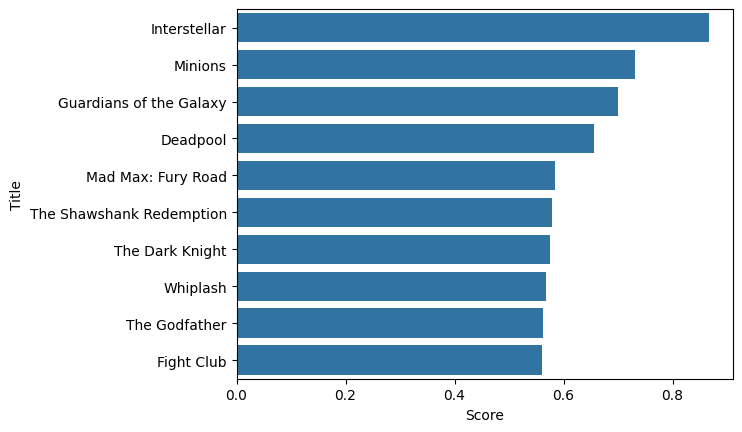

In [30]:
sns.barplot(x=score_df['Score'][:10],y=score_df['title'][:10],data=score_df)
plt.xlabel('Score')
plt.ylabel('Title')
plt.savefig("best movie by popularity and weighted average.png")

## Content-Based Recommendation Systems

In [31]:
merged_df['overview'][1]

'Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.'

In [32]:
merged_df['title']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: title, Length: 4803, dtype: object

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')
tfidf_vector

TfidfVectorizer(min_df=3, ngram_range=(1, 3), stop_words='english',
                strip_accents='unicode', token_pattern='\\w{1,}')

In [34]:
merged_df.head(2)

,budget,genres,movie_id,keywords,original_language,title,overview,popularity,production_companies,release_date,...,spoken_languages,tagline,vote_average,vote_count,crew,actor,weighted_average,normalized_popularity,normalized_weighted_average,Score
0,237000000,"Action,Adventure,Fantasy,Science Fiction",19995,"culture clash,future,space war,space colony,so...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"Stephen E. Rivkin,Rick Carter,Christopher Boye...","Sam Worthington,Zoe Saldana,Sigourney Weaver,S...",7.148013,0.171815,0.674339,0.423077
1,300000000,"Adventure,Fantasy,Action",285,"ocean,drug abuse,exotic island,east india trad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"Dariusz Wolski,Gore Verbinski,Jerry Bruckheime...","Johnny Depp,Orlando Bloom,Keira Knightley,Stel...",6.807627,0.158846,0.581403,0.370124


In [35]:
merged_df['overview'] = merged_df['overview'].fillna('')
merged_df['genres'] = merged_df['genres'].fillna('')
merged_df['keywords'] = merged_df['keywords'].fillna('')
merged_df['actor'] = merged_df['actor'].fillna('')
merged_df['crew'] = merged_df['crew'].fillna('')
tfidf_metrix = tfidf_vector.fit_transform(merged_df['overview']+merged_df['genres'])
tfidf_metrix.shape

(4803, 11120)

In [36]:
from sklearn.metrics.pairwise import sigmoid_kernel

sk = sigmoid_kernel(tfidf_metrix,tfidf_metrix)
sk

array([[0.76163192, 0.76159677, 0.76159521, ..., 0.76159416, 0.76159416,
        0.76159416],
       [0.76159677, 0.76163192, 0.76159478, ..., 0.76159492, 0.76159416,
        0.76159416],
       [0.76159521, 0.76159478, 0.76163192, ..., 0.76159474, 0.76159416,
        0.76159451],
       ...,
       [0.76159416, 0.76159492, 0.76159474, ..., 0.76163192, 0.76159491,
        0.76159466],
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76159491, 0.76163192,
        0.76159459],
       [0.76159416, 0.76159416, 0.76159451, ..., 0.76159466, 0.76159459,
        0.76163192]])

In [37]:
indexes = pd.Series(merged_df.index,index = merged_df['title']).drop_duplicates()
indexes

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [38]:
def give_recommendation(title:str,sk=sk):
    rank = indexes[title]
    sk_score = list(enumerate(sk[rank]))
    sk_score = sorted(sk_score,key=lambda x:x[1],reverse=True)
    movie =  [i[0] for i in sk_score]
    return merged_df['title'].iloc[movie]

In [39]:
give_recommendation('My Date with Drew')

4802               My Date with Drew
4532                    Lonesome Jim
4100                         Captive
3245                           50/50
2586                     Firestarter
                    ...             
4792                             キュア
4793                  On The Downlow
4794    Sanctuary: Quite a Conundrum
4796                          Primer
4798                     El Mariachi
Name: title, Length: 4803, dtype: object